## Final Project Submission

Please fill out:
* Student name:  Farhiya Jarso
* Student pace: self paced / part time / full time : Full - time
* Scheduled project review date/time: 18/3/2024 - 24/3/2024
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

1. Which are the top 10 and least 10 genres by average rating?/ The best genres to invest in? 
2. What are the 5 perfered movie languages apart from English?
3. What are the 5 best performing studios over the years?

In [195]:
#importing the necessary packages
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
#Data used
# im.db.zip
# Zipped SQLite database (you will need to unzip then query using SQLite)
# movie_basics and movie_ratings tables are the most relevant
# bom.movie_gross.csv.gz
# Compressed CSV file (you can open without expanding the file using pd.read_csv)

In [9]:
#loading im.db.zip file
conn = sqlite3.connect("zippedData\im.db\im.db")
conn

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [45]:
pd.read_sql("""
   SELECT * 
   FROM movie_basics
   """, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [46]:
pd.read_sql("""
   SELECT * 
   FROM movie_ratings
   """, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [140]:
pd.read_sql("""
   SELECT  genres, AVG(averagerating) as avg_rating 
      FROM movie_basics
    JOIN  movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
    GROUP BY genres
    ORDER BY avg_rating DESC 
    LIMIT 10
   """, conn)

,genres,avg_rating
0,"Comedy,Documentary,Fantasy",9.4
1,"Documentary,Family,Musical",9.3
2,"History,Sport",9.2
3,"Music,Mystery",9.0
4,Game-Show,9.0
5,"Drama,Short",8.8
6,"Drama,Fantasy,War",8.8
7,"Documentary,News,Sport",8.8
8,"Documentary,News,Reality-TV",8.8
9,"Comedy,Drama,Reality-TV",8.8


In [141]:
pd.read_sql("""
   SELECT  genres, AVG(averagerating) as avg_rating 
      FROM movie_basics
    JOIN  movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
    GROUP BY genres
    ORDER BY avg_rating ASC
    LIMIT 10
   """, conn)

,genres,avg_rating
0,"Comedy,Musical,Sport",1.400000
1,"Adult,Horror",2.000000
2,"Adventure,Crime,Romance",2.300000
3,"History,Sci-Fi,Thriller",2.300000
4,"Crime,Music",2.400000
5,"Horror,War",2.633333
6,"Animation,Horror,Romance",2.800000
7,"Documentary,Drama,Western",2.900000
8,"Animation,Comedy,Musical",3.133333
9,"Crime,Horror,Musical",3.150000


In [244]:
#loading the tn.movie_budgets data file
df = pd.read_csv("zippedData/tn.movie_budgets.csv")
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [246]:
df.info

<bound method DataFrame.info of       id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1  

In [269]:
print(df.columns)

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'profit'],
      dtype='object')


In [259]:
#top 5 movies by profit

# Calculate profit for each movie
df['profit'] = df['worldwide_gross'] - df['production_budget']

# Set pandas options to display large numbers in whole numbers format
pd.set_option('display.float_format', '{:.0f}'.format)

# Sort DataFrame by 'profit' in descending order
df.sort_values(by='profit', ascending=False, inplace=True)

# Select top 5 movies by profit
top_5_profits = df.head(5)

# Display the top 5 movies by profit
print("Top 5 Movies by Profit:")
print(top_5_profits[['movie', 'production_budget', 'worldwide_gross', 'profit']])

Top 5 Movies by Profit:
                                   movie  production_budget  worldwide_gross  \
0                                 Avatar          425000000       2776345279   
42                               Titanic          200000000       2208208395   
6                 Avengers: Infinity War          300000000       2048134200   
5   Star Wars Ep. VII: The Force Awakens          306000000       2053311220   
33                        Jurassic World          215000000       1648854864   

       profit  
0  2351345279  
42 2008208395  
6  1748134200  
5  1747311220  
33 1433854864  


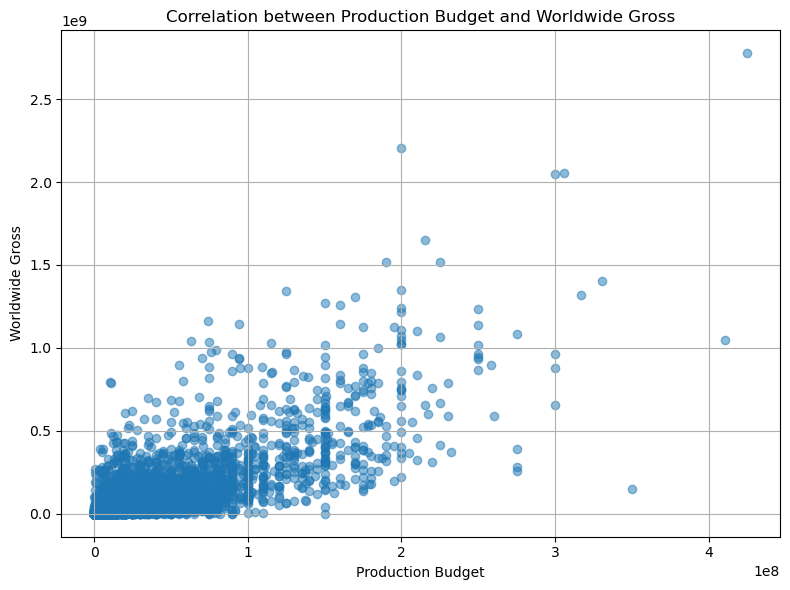

In [299]:
# Ploting a scatter plot to visualize the relationship between production_budget and world_wide profit
plt.figure(figsize=(8, 6))
plt.scatter(df['production_budget'], df['worldwide_gross'], alpha=0.5)
plt.title('Correlation between Production Budget and Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.grid(True)

plt.tight_layout()
plt.show()

In [245]:
df1 = pd.read_csv("zippedData/tmdb.movies.csv")
df1.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [270]:
print(df1.columns)

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


In [144]:
# checking for missing values in each column
missing_values = df1.isnull().any()
missing_values

Unnamed: 0           False
genre_ids            False
id                   False
original_language    False
original_title       False
popularity           False
release_date         False
title                False
vote_average         False
vote_count           False
dtype: bool

In [208]:
# showing average popularity of movies by language
#  Group by 'original_language' and calculate the mean of 'popularity' for each language
average_popularity_by_language = df1.groupby('original_language')['popularity'].mean()

# Sort languages based on average popularity and select top 5
top_5_languages = average_popularity_by_language.nlargest(5)

# Print the top 5languages by average popularity of movies
print("Top 5 Languages by Average Popularity of Movies:")
print(top_5_languages)

Top 5 Languages by Average Popularity of Movies:
original_language
nb    8.221000
sw    7.440000
ja    5.711072
hz    5.495000
uk    5.331000
Name: popularity, dtype: float64


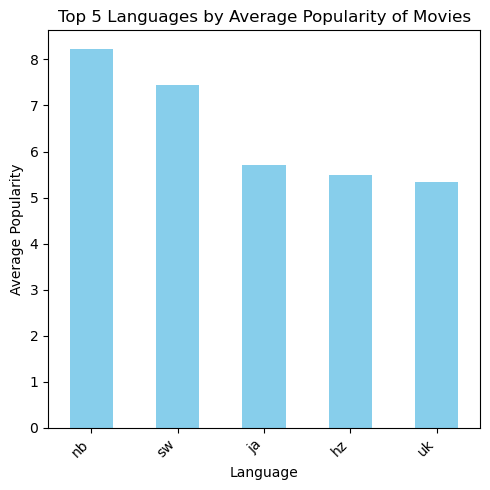

In [288]:
# Select top 5 languages by average popularity
top_5_languages = average_popularity_by_language.nlargest(5)

# Plotting bar graph showing average popularity of movies for top 5 languages
plt.figure(figsize=(5, 5))
top_5_languages.plot(kind='bar', color='skyblue')
plt.title('Top 5 Languages by Average Popularity of Movies')
plt.xlabel('Language')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [209]:
# showing average popularity of movies by language
#  Group by 'original_language' and calculate the mean of 'popularity' for each language
average_popularity_by_language = df1.groupby('original_language')['popularity'].mean()

# Sort languages based on average popularity and select top 5
least_5_languages = average_popularity_by_language.nsmallest(5)

# Print the least 5 languages by average popularity of movies
print("Least 5 Languages by Average Popularity of Movies:")
print(least_5_languages)

Least 5 Languages by Average Popularity of Movies:
original_language
bo    0.6
cr    0.6
cy    0.6
dz    0.6
ha    0.6
Name: popularity, dtype: float64


In [170]:
#loading the bom.movie data
df2 = pd.read_csv("zippedData/bom.movie_gross.csv")
df2.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [171]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [272]:
print(df2.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [172]:
# checking for missing values in each column
missing_values = df2.isnull().any()
missing_values

title             False
studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

In [173]:
# checking total missing values in each column
total_missing_values = df2.isna().sum()
total_missing_values

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [212]:
#calculating the percentage of rows with missing values in the "domestic_gross" column
percentage_missing_domestic_gross = (df2["domestic_gross"].isna().sum()/len(df2))*100
print("percentage of missing values in the domestic_gross:" , percentage_missing_domestic_gross)
#number of unique values in the "domestic_gross"
num_unique_domestic_gross = df2["domestic_gross"].nunique()
print("number of unique_domestic_gross:", num_unique_domestic_gross)

percentage of missing values in the domestic_gross: 0.0
number of unique_domestic_gross: 1290


In [169]:
#drop the "domestic_gross" empties
#df2.drop(columns=["domestic_gross"], inplace=True)
#df2.dropna(inplace =True)

In [213]:
#check the remaining nuumber of null values in each column
remaining_missing_values = df2.isna().sum()
remaining_missing_values

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

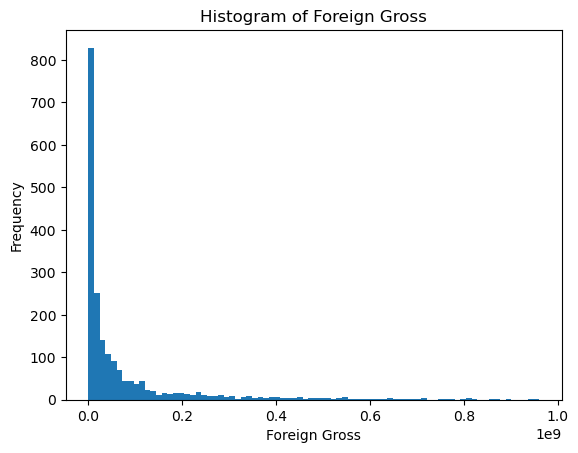

Mean_foreign_gross: 75979668.67282717
Median_foreign_gross: 19600000.0


In [214]:
#computing placeholder values for missing foreign_gross
# Convert "foreign_gross" column to numeric, handling errors
df2['foreign_gross'] = pd.to_numeric(df2['foreign_gross'], errors='coerce')

# Remove NaN values
df2.dropna(subset=['foreign_gross'], inplace=True)

# Plot histogram
plt.hist(df2['foreign_gross'], bins=80)
plt.title('Histogram of Foreign Gross')
plt.xlabel('Foreign Gross')
plt.ylabel('Frequency')
plt.show()


#print out the mean and medioan for the "foreign_gross" column
foreign_gross_mean = df2["foreign_gross"].mean()
foreign_gross_median = df2["foreign_gross"].median()

print("Mean_foreign_gross:", foreign_gross_mean)
print("Median_foreign_gross:", foreign_gross_median)



In [220]:
#imputing null vales in foreign_gross with the median
df2['foreign_gross'].fillna(foreign_gross_median, inplace=True)


In [221]:
#checking the remaing null values
remaining_missing_values = df2.isna().sum()
remaining_missing_values

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [218]:
percentage_missing_studio = (df2["studio"].isna().sum()/len(df2))*100
print("percentage of missing values in the studio:" , percentage_missing_studio)
#number of unique values in the "studio"
num_unique_studio = df2["studio"].nunique()
print("number of unique studio:", num_unique_studio)

percentage of missing values in the studio: 0.0
number of unique studio: 172


In [219]:
#dropping the rows containing values in studio
df2.dropna(inplace =True)

In [217]:
#checking the remaing null values
remaining_missing_values = df2.isna().sum()
remaining_missing_values

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [260]:
#Calculate the average domestic_gross,  for each studio per year

# Convert 'year' column to datetime if it's not already in datetime format
df2['year'] = pd.to_datetime(df2['year'], format='%Y')

# Set pandas options to display large numbers in whole numbers format
pd.set_option('display.float_format', '{:.0f}'.format)

# Group by 'studio' and 'year' and calculate the average domestic_gross
average_domestic_gross_per_studio_year = df2.groupby(['studio', df2['year'].dt.year])['domestic_gross'].mean()

# Sort studios based on average domestic gross revenue and select top 10
top_10_studios = average_domestic_gross_per_studio_year.nlargest(10)

# # Print the resulting Series
# print(average_domestic_gross_per_studio_year)
# Print the top 10 studios
print("Top 10 Studios by Average Domestic Gross Revenue:")
print(top_10_studios)


Top 10 Studios by Average Domestic Gross Revenue:
studio   year
BV       2017   297275000
         2018   262977778
P/DW     2011   222300000
BV       2016   220846154
         2013   181640000
P/DW     2010   169425000
BV       2015   155900000
WB (NL)  2012   148466667
BV       2012   130291667
WB (NL)  2013   126780000
Name: domestic_gross, dtype: float64


In [261]:
#Calculate the average foreign_gross  for each studio per year

# Convert 'year' column to datetime if it's not already in datetime format
df2['year'] = pd.to_datetime(df2['year'], format='%Y')

# Set pandas options to display large numbers in whole numbers format
pd.set_option('display.float_format', '{:.0f}'.format)

# Group by 'studio' and 'year' and calculate the average domestic_gross
average_foreign_gross_per_studio_year = df2.groupby(['studio', df2['year'].dt.year])['foreign_gross'].mean()

# Print the resulting Series
print(average_foreign_gross_per_studio_year)

studio  year
3D      2010    9900000
A24     2013   15450000
        2014    3400000
        2015   13933333
        2016   11172440
                 ...   
Zee     2016     571000
Zeit.   2010    6650000
        2011    2100000
        2012    1200000
        2014    3700000
Name: foreign_gross, Length: 493, dtype: float64


In [240]:
# Group by 'studio' and calculate the mean of 'domestic_gross' and 'foreign_gross' across all data
average_gross_per_studio = df2.groupby('studio').agg({'domestic_gross': 'mean', 'foreign_gross': 'mean'})

# Round the average domestic gross and foreign gross values to whole numbers
average_gross_per_studio['domestic_gross'] = average_gross_per_studio['domestic_gross'].round()
average_gross_per_studio['foreign_gross'] = average_gross_per_studio['foreign_gross'].round()

# Sort studios based on average domestic gross revenue and select top 5
top_5_domestic_studios = average_gross_per_studio['domestic_gross'].nlargest(5)

# Sort studios based on average foreign gross revenue and select top 5
top_5_foreign_studios = average_gross_per_studio['foreign_gross'].nlargest(5)

# Print the top 5 studios for domestic gross
print("Top 5 Studios by Average Domestic Gross Revenue:")
print(top_5_domestic_studios)

# Print the top 5 studios for foreign gross
print("\nTop 5 Studios by Average Foreign Gross Revenue:")
print(top_5_foreign_studios)

Top 5 Studios by Average Domestic Gross Revenue:
studio
P/DW       168290000.0
BV         164519894.0
WB          93258462.0
WB (NL)     90343182.0
MGM         83000000.0
Name: domestic_gross, dtype: float64

Top 5 Studios by Average Foreign Gross Revenue:
studio
HC          867600000.0
P/DW        339360000.0
BV          252880904.0
GrtIndia    234000000.0
Fox         149670646.0
Name: foreign_gross, dtype: float64


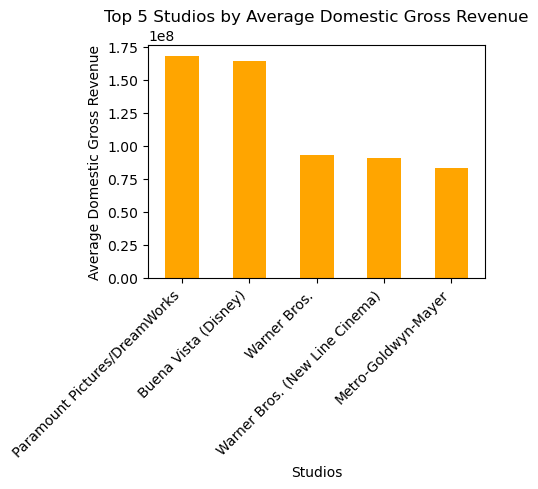

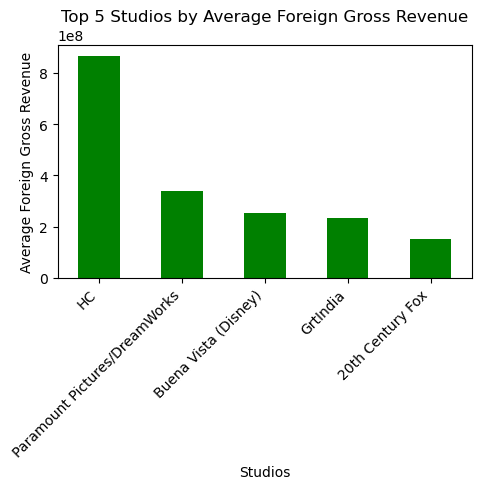

In [290]:
# Define a dictionary mapping studio codes to full names
studio_names_mapping = {
    'P/DW': 'Paramount Pictures/DreamWorks',
    'BV': 'Buena Vista (Disney)',
    'WB': 'Warner Bros.',
    'WB (NL)': 'Warner Bros. (New Line Cinema)',
    'MGM': 'Metro-Goldwyn-Mayer',
    'Uni.': 'Universal Pictures',
    'Fox': '20th Century Fox',
    'Par.': 'Paramount Pictures',
    'Sony': 'Sony Pictures',
    'Sum.': 'Summit Entertainment'
    # Add more mappings as needed
}

# Replace studio codes with full names
top_5_domestic_studios_with_names = top_5_domestic_studios.rename(index=studio_names_mapping)
top_5_foreign_studios_with_names = top_5_foreign_studios.rename(index=studio_names_mapping)

# Set pandas options to display large numbers in whole numbers format
pd.set_option('display.float_format', '{:.0f}'.format)

# Plotting the bar graph for top 5 domestic gross studios with full names
plt.figure(figsize=(5, 5))
top_5_domestic_studios_with_names.plot(kind='bar', color='orange')
plt.title('Top 5 Studios by Average Domestic Gross Revenue')
plt.xlabel('Studios')
plt.ylabel('Average Domestic Gross Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the bar graph for top 5 foreign gross studios with full names
plt.figure(figsize=(5, 5))
top_5_foreign_studios_with_names.plot(kind='bar', color='green')
plt.title('Top 5 Studios by Average Foreign Gross Revenue')
plt.xlabel('Studios')
plt.ylabel('Average Foreign Gross Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [264]:
# Group by 'studio' and calculate the mean of 'domestic_gross' and 'foreign_gross' across all data
average_gross_per_studio = df2.groupby('studio').agg({'domestic_gross': 'mean', 'foreign_gross': 'mean'})

# Round the average domestic gross and foreign gross values to whole numbers
average_gross_per_studio['domestic_gross'] = average_gross_per_studio['domestic_gross'].round()
average_gross_per_studio['foreign_gross'] = average_gross_per_studio['foreign_gross'].round()

# Sort studios based on average domestic gross revenue and select top least 10
least_5_domestic_studios = average_gross_per_studio['domestic_gross'].nsmallest(5)

# Sort studios based on average foreign gross revenue and select least 5
least_5_foreign_studios = average_gross_per_studio['foreign_gross'].nsmallest(5)

# Print the least 5 studios for domestic gross
print("Least 5 Studios by Average Domestic Gross Revenue:")
print(least_5_domestic_studios)

# Print the  least 5 studios for foreign gross
print("\nLeast 5 Studios by Average  Gross Revenue:")
print(least_5_foreign_studios)

Least 5 Studios by Average Domestic Gross Revenue:
studio
DR             800
Shout!        2800
ParC          5900
Libre         7200
Grindstone   10000
Name: domestic_gross, dtype: float64

Least 5 Studios by Average  Gross Revenue:
studio
Darin Southa    5200
ICir            6400
IVP             9100
ITL            11800
Icar.          13700
Name: foreign_gross, dtype: float64


In [308]:
df2.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year', 'profit'], dtype='object')

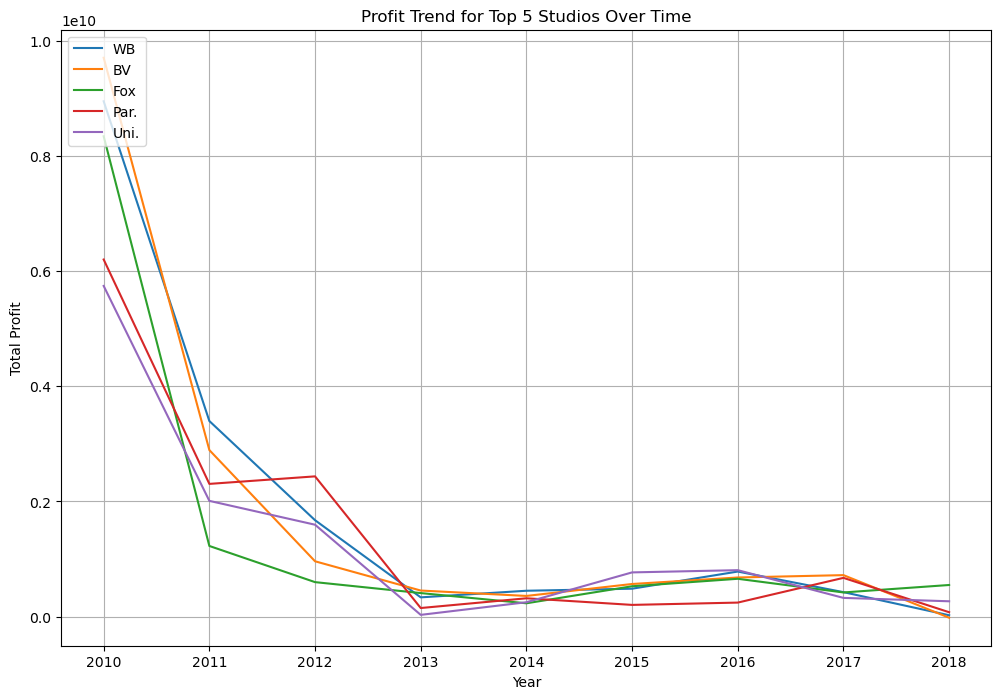

In [309]:
# Plotting graph for best performing studios
# Group by studio and year, and calculate total profit
studio_year_profit = df2.groupby(['studio', 'year'])['profit'].sum().reset_index()

# Find top 5 studios based on total profit
top_5_studios = studio_year_profit.groupby('studio')['profit'].sum().nlargest(5).index

# Filter data to include only top 5 studios
top_5_studio_data = studio_year_profit[studio_year_profit['studio'].isin(top_5_studios)]

# Create line graphs for each studio
plt.figure(figsize=(12, 8))
for studio in top_5_studios:
    studio_data = top_5_studio_data[top_5_studio_data['studio'] == studio]
    plt.plot(studio_data['year'], studio_data['profit'], label=studio)

plt.title('Profit Trend for Top 5 Studios Over Time')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()